In [1]:
#These are just some needed libraries
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
#We generate artificial data
X = np.random.randint(1, high = 1000, size = (200,1))
y = 4 + ((0.032 * X) + np.random.randint(1, high = 15, size = (200,1)))
y = y.astype(int)

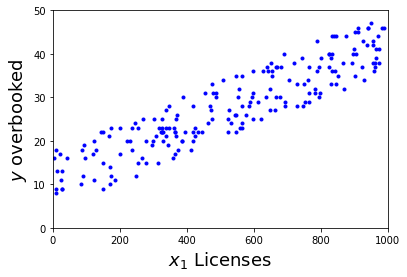

In [3]:
# Plotting the data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$ Licenses", fontsize=18)
plt.ylabel("$y$ overbooked", rotation=90, fontsize=18)
plt.axis([0, 1000, 0, 50])
plt.show()

In [15]:
# Just to visualize the data in a database-like format
Xlist = np.concatenate(X)
ylist = np.concatenate(y)

df = pd.DataFrame(zip(Xlist,ylist),columns=['Purchased Licenses', 'Known Overbookings'])

print(df)

     Purchased Licenses  Known Overbookings
0                   643                  36
1                   566                  35
2                   337                  27
3                   982                  46
4                   898                  40
..                  ...                 ...
195                 790                  36
196                 547                  26
197                 254                  23
198                 893                  38
199                 841                  44

[200 rows x 2 columns]


In [20]:
#Here we are trying to identify our two values
#the "intercept" -> theta_0 and
#the "weight" to our one feature -> theta_1 
#Adding a "one" is required to reflect that we are dealing with two thetas  
X_b = np.c_[np.ones((200, 1)), X]  # add x0 = 1 to each instance
#This approach is called "normal equation" to find the value of θ (this means both theta_0 and theta_1) 
#that minimizes the cost function. The Normal Equation gets very slow when the number of features grows large (e.g., 100,000).
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [21]:
#So here we have a solution, an intercept at ??? and a slope of ???
theta_best

array([[11.48913238],
       [ 0.0310208 ]])

In [23]:
#We plot our solution (the red line)
plt.plot(X, y, "b.")
plt.axis([0, 1000, 0, 50])
plt.xlabel("$x_1$ Licenses", fontsize=18)
plt.ylabel("$y$ overbooked", rotation=90, fontsize=18)
x_vals = X
#What values do you need to insert here?
y_vals = ??? + ??? * X
plt.plot(x_vals, y_vals, 'r-', linewidth=0.5, label="Predictions")
plt.legend(loc="upper left", fontsize=14)
plt.show()

SyntaxError: invalid syntax (<ipython-input-23-40546507ae41>, line 8)

In [24]:
#Similar approach using a standard library
#also uses a least squares method, but a different computation called "pseudoinverse"
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([11.48913238]), array([[0.0310208]]))

In [28]:
#Making a single prediction
customer_licenses = ???                  
overbooked_prediction = lin_reg.predict([[customer_licenses]])

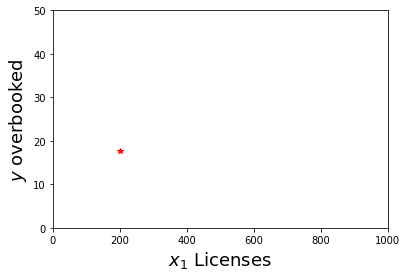

In [30]:
#Visualizing a single prediction
plt.plot(customer_licenses, ???, "r*")
plt.axis([0, 1000, 0, 50])
plt.xlabel("$x_1$ Licenses", fontsize=18)
plt.ylabel("$y$ overbooked", rotation=90, fontsize=18)
plt.show()

In [32]:
#We generate artificial data
X = np.random.randint(1, high = 1000, size = (200,1))
y = 0.00000002 * X**3 + np.random.randint(1, high = 15, size = (200,1))
y = y.astype(int)

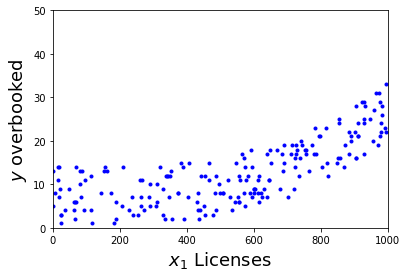

In [33]:
# Plotting the data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$ Licenses", fontsize=18)
plt.ylabel("$y$ overbooked", rotation=90, fontsize=18)
plt.axis([0, 1000, 0, 50])
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([259])

In [35]:
X_poly[0]

array([  259., 67081.])

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([8.82725684]), array([[-1.64707575e-02,  3.42081091e-05]]))

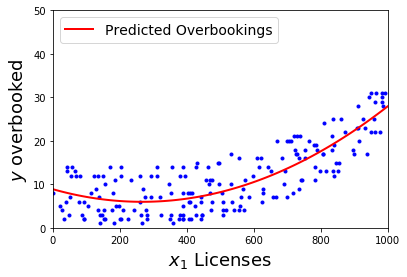

In [547]:
X_new=np.linspace(0, 1000, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predicted Overbookings")
plt.xlabel("$x_1$ Licenses", fontsize=18)
plt.ylabel("$y$ overbooked", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 1000, 0, 50])
plt.show()



In [583]:
#Split Function -> from Geron, A. "https://github.com/ageron/handson-ml2/blob/master/
#02_end_to_end_machine_learning_project.ipynb"
#For illustration only. Sklearn has a train_test_split() function
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#Train and test split example

#c_ -> stack on top of each other
#c_ is function "Translates slice objects to concatenation along the second axis."
#a single_trailing_underscore_ is used by convention to avoid conflicts with Python keyword
LicenseOverbookings = np.c_[y, X]

#Convert to Dataframe
LicenseOverbookingsDf = pd.DataFrame(LicenseOverbookings)
print(df)

#Create Train and Test Dataset
train_set, test_set = split_train_test(LicenseOverbookingsDf, 0.2)



      0    1
0    21  231
1    42  957
2    20   66
3    17  210
4    16  348
..   ..  ...
195  12   66
196  28  371
197  42  987
198  27  419
199  15  104

[200 rows x 2 columns]


In [580]:
len(test_set)

40

In [581]:
len(train_set)

160

<bound method DataFrame.info of       0    1
115  34  825
189  31  833
136  13   35
128  31  460
153  29  707
..   ..  ...
180  44  827
110  41  781
159  32  600
42   19  361
54   34  646

[160 rows x 2 columns]>